In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')

# Exploring data

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# columns:
Release_Date: Date when the movie was released.

Title: Name of the movie.

Overview: Brief summary of the movie.

Popularity: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.

Vote_Count: Total votes received from the viewers.

Vote_Average: Average rating based on vote count and the number of viewers out of 10.

Original_Language: Original language of the movies. Dubbed version is not considered to be original language.

Genre: Categories the movie it can be classified as.

Poster_Url: Url of the movie poster.

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df[df.duplicated()]
#there is no full duplicated rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url


In [7]:
df[df.duplicated(subset=['Title'], keep=False)].sort_values('Title').head()
#I found that there are movies with the same name

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
3270,2015-05-22,365 Days,This film tracks a hasty marriage through its ...,28.341,12,4.8,te,Romance,https://image.tmdb.org/t/p/original/AoFyZGDgfr...
1424,2020-02-07,365 Days,"A woman falls victim to a dominant mafia boss,...",52.418,6540,7.0,pl,"Drama, Romance",https://image.tmdb.org/t/p/original/6KwrHucIE3...
5993,1984-10-09,A Christmas Carol,A bitter old miser who makes excuses for his u...,18.546,241,7.3,en,"Drama, Fantasy, TV Movie, Family",https://image.tmdb.org/t/p/original/kGmpIkjVRW...
2052,2009-11-04,A Christmas Carol,Miser Ebenezer Scrooge is awakened on Christma...,39.916,3732,6.9,en,"Animation, Family, Drama, Fantasy",https://image.tmdb.org/t/p/original/goHDZUnqZJ...
2169,2010-04-30,A Nightmare on Elm Street,The film that brings back horror icon Freddy K...,38.399,2187,5.5,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/4W2GvVM89X...


In [8]:
df[df.duplicated(subset=['Title', 'Release_Date'])].sort_values('Title')
#there is no movies with same name and release date
#I checked google if it is possible for movies to have the same name and the answer was yes it is.

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url


In [9]:
df.isna().sum()
#There is no null values

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year

In [11]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [12]:
df['Genre'].nunique()

2337

In [13]:
df['Genre']=df['Genre'].str.split(',')
df = df.explode('Genre')
df.reset_index(drop=True, inplace=True)
df['Genre'] = [x.strip() for x in df['Genre']]

In [14]:
df.drop(columns=['Poster_Url','Overview'], inplace=True)

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,en,Crime
4,2022,The Batman,3827.658,1151,8.1,en,Mystery


In [16]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

In [17]:
#I collected a list of languages from google
list_of_languages = ['aa','ab','af','ak','als','am','an','ang','ang','ar','arc','as','ast','av','awa','ay','az',
'ba','bar','bat-smg','bcl','be','be-x-old','bg','bh','bi','bm','bn','bo','bpy','br','brx','bs','bug','bxr','ca',
'cdo','ce','ceb','ch','cho','chr','chy','ckb','co','cr','cs','csb','cu','cv','cy','da','de','diq','dsb','dv','dz',
'ee','el','en','eo','es','et','eu','ext','fa','ff','fi','fiu-vro','fj','fo','fr','frp','fur','fy','ga','gan','gbm',
'gd','gil','gl','gn','got','gu','gv','ha','hak','haw','he','hi','ho','hr','ht','hu','hy','hz','ia','id','ie','ig',
'ii','ik','ilo','inh','io','is','it','iu','ja','jbo','jv','ka','kg','ki','kj','kk','kl','km','kn','khw','ko','kr',
'ks','ksh','ku','kv','kw','ky','la','lad','lan','lb','lg','li','lij','lmo','ln','lo','lzz','lt','lv','map-bms','mg',
'man','mh','mi','min','mk','ml','mn','mo','mr','mrh','ms','mt','mus','mwl','my','na','nah','nap','nd','nds','nds-nl',
'ne','new','ng','nl','nn','no','nr','nso','nrm','nv','ny','oc','oj','om','or','os','pa','pag','pam','pap','pdc','pi',
'pih','pl','pms','ps','pt','qu','rm','rmy','rn','ro','roa-rup','ru','rw','sa','sc','scn','sco','sd','se','sg','sh',
'si','simple','sk','sl','sm','sn','so','sq','sr','ss','st','su','sv','sw','ta','te','tet','tg','th','ti','tk','tl',
'tlh','tn','to','tpi','tr','ts','tt','tum','tw','ty','udm','ug','uk','ur','uz','uz_AF','ve','vi','vec','vls','vo',
'wa','war','wo','xal','xh','xmf','yi','yo','za','zh','zh-classical','zh-min-nan','zh-yue','zu','nb','cn']

In [18]:
list_of_languages = [x.lower() for x in list_of_languages]
df['Original_Language'] = [x.lower() for x in df['Original_Language']]

In [19]:
for lang in df['Original_Language'].unique():
    if lang not in list_of_languages:
        print(lang)

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,en,Crime
4,2022,The Batman,3827.658,1151,8.1,en,Mystery


In [21]:
original_df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


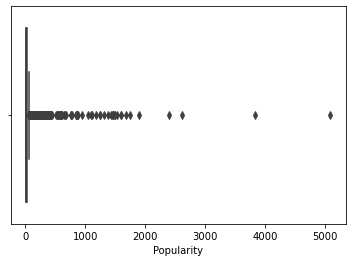

In [22]:
sns.boxplot(x='Popularity', data=original_df)
plt.show()
#there are outliers in popularity column but its ok since there are movies which are wide popular

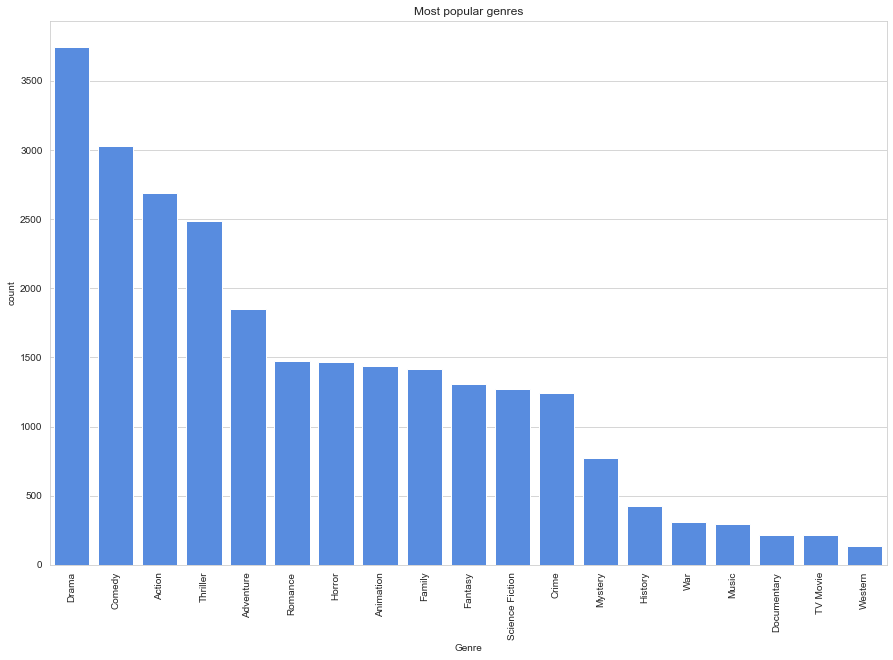

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, color = '#4287f5')
plt.xticks(rotation=90)
plt.title('Most popular genres')
plt.show()

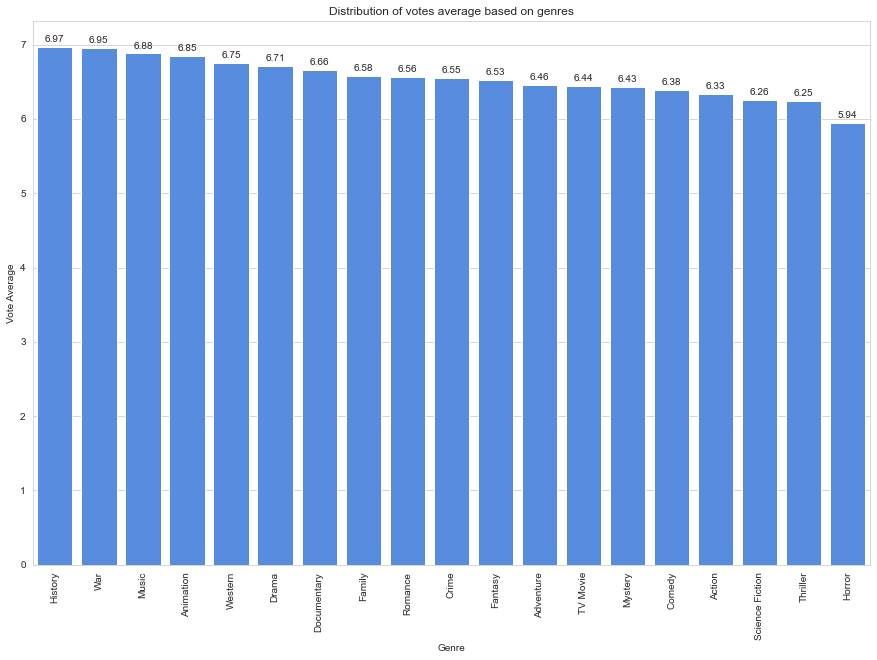

In [24]:
order = df.groupby('Genre')['Vote_Average'].mean().sort_values(ascending=False).index
labels = round(df.groupby('Genre')['Vote_Average'].mean().sort_values(ascending=False),2)

plt.figure(figsize=(15,10))
g = sns.barplot(x='Genre', y='Vote_Average', data=df, ci=None, order=order
            ,color = '#4287f5')
plt.xticks(rotation=90)
plt.title('Distribution of votes average based on genres')
g.set(ylabel='Vote Average')
g.bar_label(g.containers[0], labels=labels, padding=3)
plt.show()

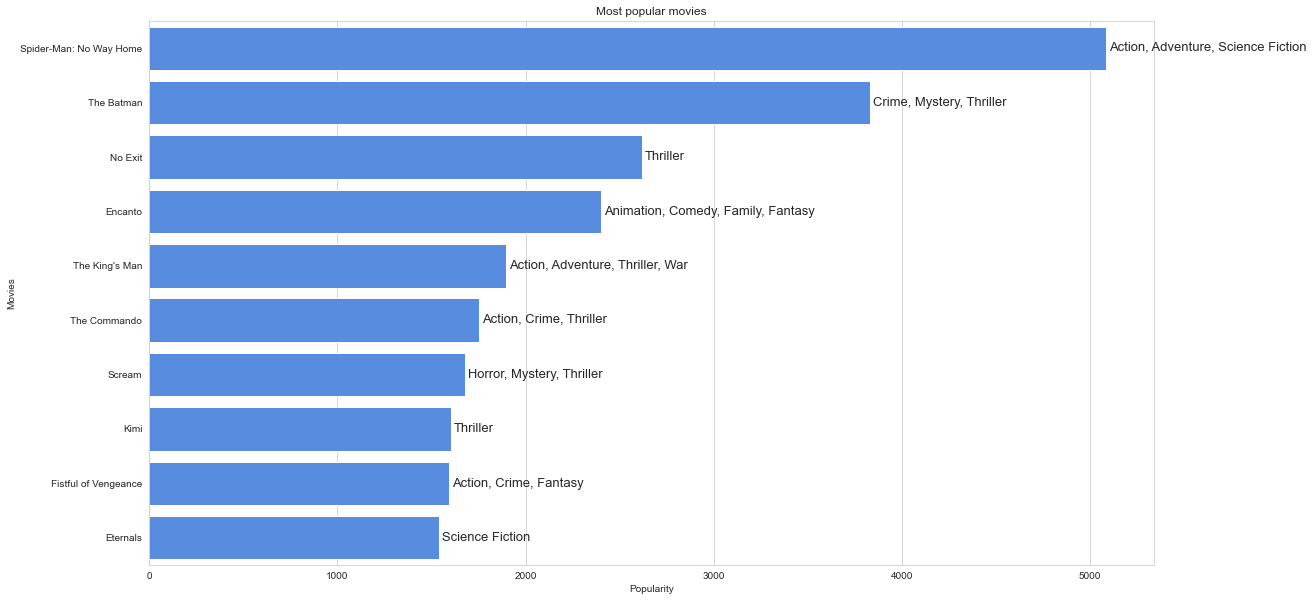

In [25]:
plt.figure(figsize=(18,10))
popular_movies = original_df[['Title', 'Popularity', 'Genre']].sort_values('Popularity', ascending=False)[:10]
g = sns.barplot(x='Popularity', y='Title', data=popular_movies, color = '#4287f5')
plt.title('Most popular movies')
g.set(ylabel='Movies')
g.bar_label(g.containers[0], labels=popular_movies['Genre'], padding=3, size=13)
plt.show()

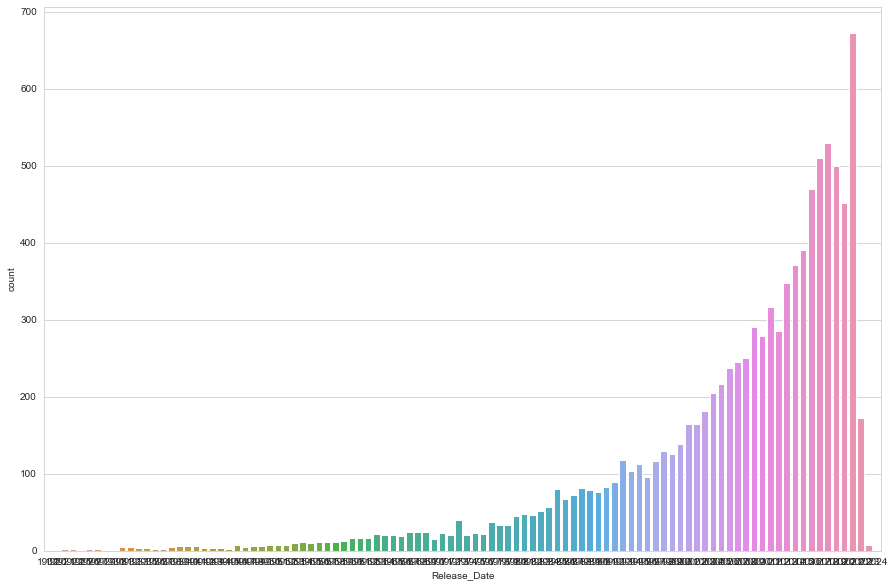

In [26]:
dfc = original_df
dfc['Release_Date'] = pd.to_datetime(dfc['Release_Date']).dt.year
plt.figure(figsize=(15,10))
sns.countplot(dfc['Release_Date'][82:])
plt.show()

In [27]:
df['Release_Date'].nunique()

102